In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import category_encoders as ce

date_format = "%m/%d/%Y"

### Predicting Customer Response
Predictive Methods of Data Mining

# I. Data Understanding


In [2]:
df = pd.read_excel('Group35_SmartHome_Campaign.xlsx', index_col="Custid")

/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/openpyxl/styles/stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntLighting,MntCameras,...,Complain,Z_CostContact,Z_Revenue,DepVar,Group,Element1,Element2,Element3,Element4,Element5
Custid,,,,,,,,,,,,,,,,,,,,,
350001144,1974,Master,Divorced,75436.0,0,2,2018-10-05,32,353,19,...,0,4,14,0,Group35,M2014343,M20200125,M20200319,NaN,NaN
350001148,1992,PhD,Single,37029.0,1,0,2019-03-17,30,6,7,...,0,4,14,0,Group35,M2014343,M20200125,M20200319,NaN,NaN
350001150,1963,Graduation,Single,112765.0,0,0,2018-06-05,72,465,20,...,0,4,14,0,Group35,M2014343,M20200125,M20200319,NaN,NaN
350001155,1975,PhD,Divorced,50518.0,1,0,2019-02-17,42,14,5,...,0,4,14,0,Group35,M2014343,M20200125,M20200319,NaN,NaN
350001156,1977,PhD,Together,41238.0,2,0,2017-10-10,59,244,12,...,0,4,14,1,Group35,M2014343,M20200125,M20200319,NaN,NaN


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2500.0,1974.177200,12.024194,1946.0,1964.0,1975.0,1983.0,2001.0
Income,2475.0,69900.762424,29712.980963,2268.0,47223.0,70380.0,92933.0,189666.0
Kidhome,2500.0,0.443200,0.540824,0.0,0.0,0.0,1.0,2.0
Teenhome,2500.0,0.485600,0.551647,0.0,0.0,0.0,1.0,2.0
Recency,2500.0,49.907200,28.710059,0.0,25.0,51.0,74.0,99.0
MntLighting,2500.0,368.802800,404.467450,0.0,28.0,219.0,614.0,1761.0
MntCameras,2500.0,26.668000,40.202252,0.0,1.0,8.0,33.0,199.0
MntDoor_Locks,2500.0,189.104400,245.271410,0.0,18.0,73.0,267.0,1093.0
MntThermostats,2500.0,32.678400,48.236618,0.0,3.0,10.0,42.0,239.0
MntSecurity_Systems,2453.0,32.688137,50.833567,0.0,3.0,10.0,38.0,267.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 350001144 to 350011119
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2500 non-null   int64         
 1   Education            2500 non-null   object        
 2   Marital_Status       2500 non-null   object        
 3   Income               2475 non-null   float64       
 4   Kidhome              2500 non-null   int64         
 5   Teenhome             2500 non-null   int64         
 6   Dt_Customer          2500 non-null   datetime64[ns]
 7   Recency              2500 non-null   int64         
 8   MntLighting          2500 non-null   int64         
 9   MntCameras           2500 non-null   int64         
 10  MntDoor_Locks        2500 non-null   int64         
 11  MntThermostats       2500 non-null   int64         
 12  MntSecurity_Systems  2453 non-null   float64       
 13  MntPremium          

# II. Data Preparation
First, we will convert the dates column into numerical values. Then, we will create a MntTotal column that is the sum of all other monetary columns.</p>

In [7]:
df_prep = df.copy(deep=True)

In [8]:
#Creating columns for age and days as a Customer instead of using the regular values
df_prep['Age'] = 2020 - df_prep['Year_Birth']
df_prep['DaysAsCustomer'] = (datetime.strptime('03/18/2021', date_format) - df_prep['Dt_Customer']).dt.days

#Changing the columns teenhome and kidhome to boolean
df_prep["Kidhome"] = np.where(df_prep["Kidhome"] == 0, df_prep["Kidhome"], 1)
df_prep["Teenhome"] = np.where(df_prep["Teenhome"] == 0, df_prep["Teenhome"], 1)
#Creating new column to know if the person has kid, teen, both or none
df_prep["Children"] = df_prep["Kidhome"] + df_prep["Teenhome"]

#Creating a total acceptance column and droping the previous ones
df_prep["AcceptCmpTotal"] = df_prep["AcceptedCmp1"] + df_prep["AcceptedCmp2"] + df_prep["AcceptedCmp3"] + df_prep["AcceptedCmp4"] + df_prep["AcceptedCmp5"]

#Droping original columns
df_prep.drop(['Year_Birth', 'Dt_Customer', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Teenhome', 'Kidhome'], axis=1, inplace=True)

#Droping the columns for group identification
df_prep.drop(['Group', 'Element1', 'Element2', 'Element3', 'Element4', 'Element5'], axis=1, inplace=True)

In [9]:
df_prep

,Education,Marital_Status,Income,Recency,MntLighting,MntCameras,MntDoor_Locks,MntThermostats,MntSecurity_Systems,MntPremium,...,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,DepVar,Age,DaysAsCustomer,Children,AcceptCmpTotal
Custid,,,,,,,,,,,,,,,,,,,,,
350001144,Master,Divorced,75436.0,32,353,19,179,11,5.0,11.0,...,10,3,0,4,14,0,46,895,1,0
350001148,PhD,Single,37029.0,30,6,7,16,0,6.0,9.0,...,3,6,0,4,14,0,28,732,1,0
350001150,Graduation,Single,112765.0,72,465,20,785,35,64.0,196.0,...,11,5,0,4,14,0,57,1017,0,0
350001155,PhD,Divorced,50518.0,42,14,5,29,5,4.0,17.0,...,4,5,0,4,14,0,45,760,1,0
350001156,PhD,Together,41238.0,59,244,12,76,11,15.0,149.0,...,3,8,0,4,14,1,43,1255,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350011108,Graduation,Single,12962.0,7,8,17,18,5,20.0,51.0,...,3,8,0,4,14,1,33,1262,1,0
350011109,PhD,Married,92837.0,79,876,21,201,64,102.0,39.0,...,11,6,0,4,14,0,52,658,1,0
350011110,PhD,Married,62675.0,73,207,1,13,0,0.0,2.0,...,4,9,0,4,14,0,68,630,2,0


## Spoting Outliers

### Recency, Frequence and Monetary Measures

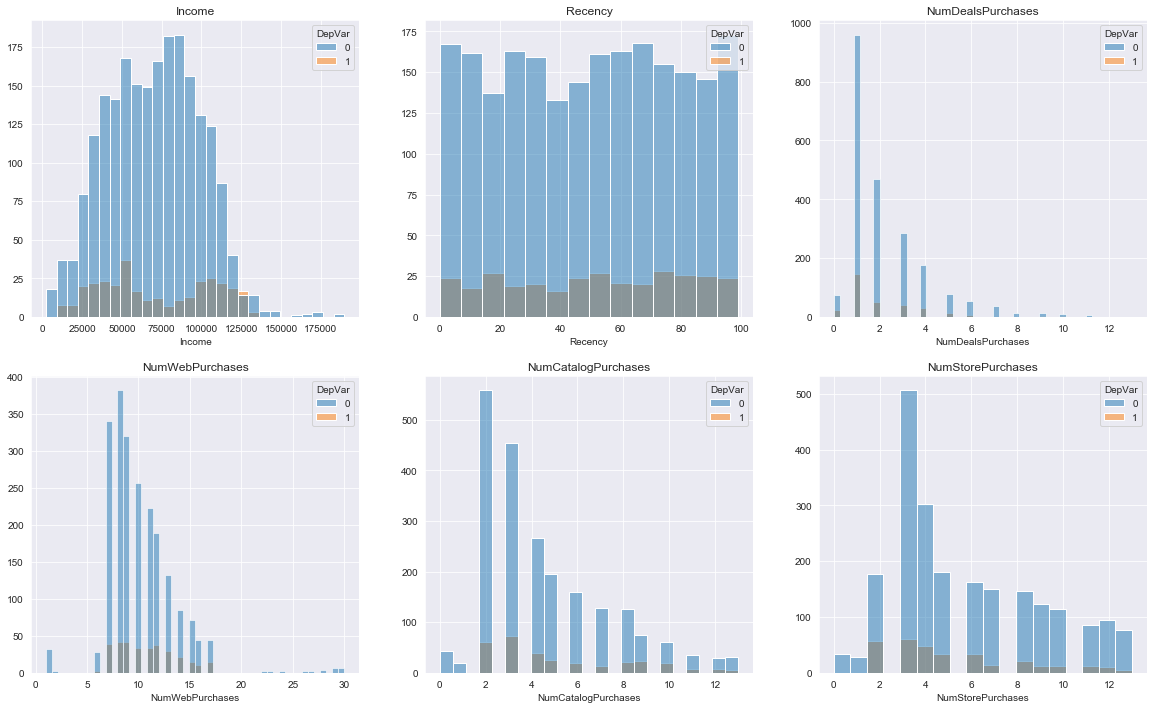

In [10]:
# vars com outliers
sns.set_style(style="darkgrid") 
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))

sns.histplot(data=df_prep, x='Income', hue="DepVar", ax=axes[0][0]).set(ylabel=None);
sns.histplot(data=df_prep, x='Recency', hue="DepVar", ax=axes[0][1]).set(ylabel=None);
sns.histplot(data=df_prep, x='NumDealsPurchases', hue="DepVar", ax=axes[0][2]).set(ylabel=None);
sns.histplot(data=df_prep, x='NumWebPurchases', hue="DepVar", ax=axes[1][0]).set(ylabel=None);
sns.histplot(data=df_prep, x='NumCatalogPurchases', hue="DepVar", ax=axes[1][1]).set(ylabel=None);
sns.histplot(data=df_prep, x='NumStorePurchases', hue="DepVar", ax=axes[1][2]).set(ylabel=None);

axes[0][0].set(title='Income');
axes[0][1].set(title='Recency');
axes[0][2].set(title='NumDealsPurchases');
axes[1][0].set(title='NumWebPurchases');
axes[1][1].set(title='NumCatalogPurchases');
axes[1][2].set(title='NumStorePurchases');

plt.show();

### RFM Outliers Removal
- Income: > 150.000
- Recency: nothing
- NumDealPurchases:
- NumWebPurchases:
- NumCatalogPurchases:
- NumStorePurchases:

In [11]:
incomeCap = 150000
dealPurCap = 12
webPurCap = 20

df_prep = df_prep[df_prep["Income"] < incomeCap]
df_prep = df_prep[df_prep["NumDealsPurchases"] < dealPurCap]
df_prep = df_prep[df_prep["NumWebPurchases"] < webPurCap]

In [12]:
df_prep.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2444.0,69589.882979,28781.846965,2268.0,47350.0,70178.0,92160.00,149126.0
Recency,2444.0,49.859656,28.720546,0.0,25.0,51.0,74.00,99.0
MntLighting,2444.0,372.014730,404.801032,0.0,29.0,224.5,618.50,1761.0
MntCameras,2444.0,27.012684,40.395135,0.0,2.0,9.0,34.00,199.0
MntDoor_Locks,2444.0,191.349427,246.396088,0.0,18.0,76.0,274.00,1093.0
MntThermostats,2444.0,33.083061,48.524872,0.0,3.0,10.0,43.25,239.0
MntSecurity_Systems,2400.0,31.271250,47.570620,0.0,3.0,10.0,36.00,267.0
MntPremium,2404.0,51.089434,60.116843,0.0,11.0,29.0,68.00,408.0
NumDealsPurchases,2444.0,2.219313,1.775400,0.0,1.0,2.0,3.00,11.0
NumWebPurchases,2444.0,10.010638,2.848165,1.0,8.0,10.0,12.00,17.0


### Customer Characteristincs Columns

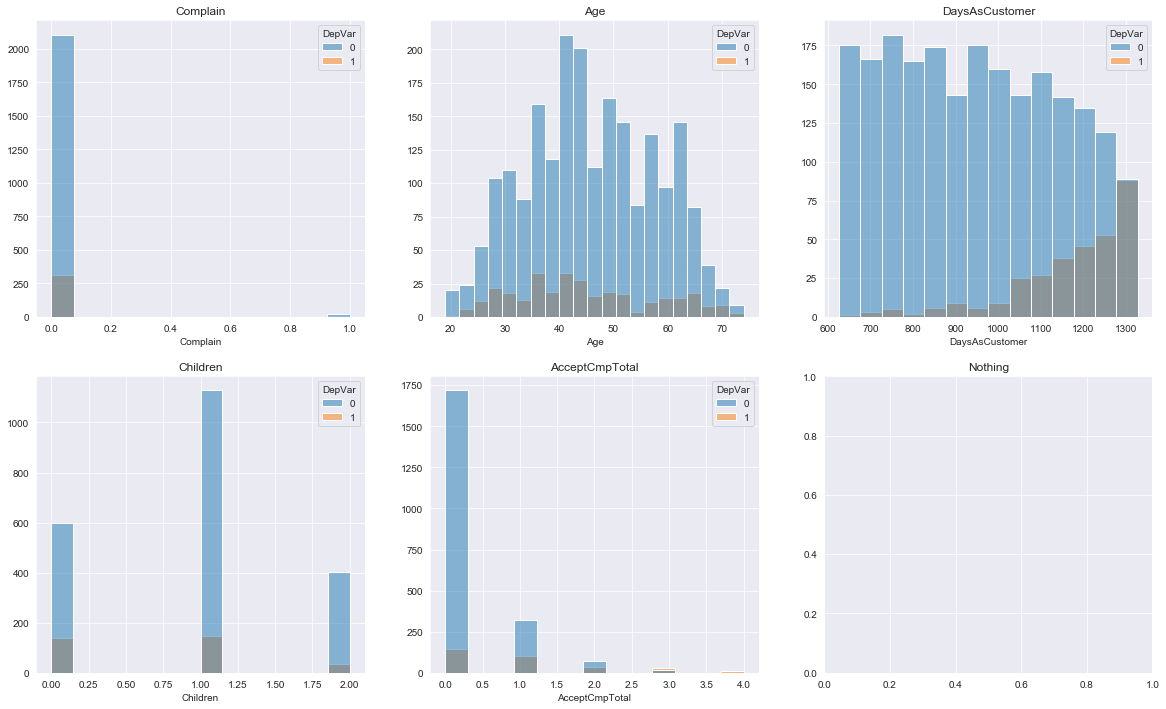

In [13]:
# vars com outliers
sns.set_style(style="darkgrid") 
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))

sns.histplot(data=df_prep, x='Complain', hue="DepVar", ax=axes[0][0]).set(ylabel=None);
sns.histplot(data=df_prep, x='Age', hue="DepVar", ax=axes[0][1]).set(ylabel=None);
sns.histplot(data=df_prep, x='DaysAsCustomer', hue="DepVar", ax=axes[0][2]).set(ylabel=None);
sns.histplot(data=df_prep, x='Children', hue="DepVar", ax=axes[1][0]).set(ylabel=None);
sns.histplot(data=df_prep, x='AcceptCmpTotal', hue="DepVar", ax=axes[1][1]).set(ylabel=None);

axes[0][0].set(title='Complain');
axes[0][1].set(title='Age');
axes[0][2].set(title='DaysAsCustomer');
axes[1][0].set(title='Children');
axes[1][1].set(title='AcceptCmpTotal');
axes[1][2].set(title='Nothing');

plt.show();

### RFM Outliers Removal
- Complain: we will remove users who complained previously from the model.
- Age: nothing
- DaysAsCustomer: nothing
- Children: nothing
- AcceptCmpTotal: nothing

In [14]:
print(df.shape[0] - df_prep.shape[0], " outliers were remove during the process;")
print((df_prep.shape[0]/df.shape[0])*100, "'%' of the database remains")

56  outliers were remove during the process;
97.76 '%' of the database remains


<h2>Dealing with Missing Values</h2>

In [15]:
print(df_prep.isna().sum())

Education               0
Marital_Status          0
Income                  0
Recency                 0
MntLighting             0
MntCameras              0
MntDoor_Locks           0
MntThermostats          0
MntSecurity_Systems    44
MntPremium             40
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Z_CostContact           0
Z_Revenue               0
DepVar                  0
Age                     0
DaysAsCustomer          0
Children                0
AcceptCmpTotal          0
dtype: int64


### Monetary Missing Values
Simply replace by 0

In [16]:
#Filling NaN on MntSecurity_Systems and MntPremium by 0
df_prep['MntSecurity_Systems'].fillna(0, inplace=True)
df_prep['MntPremium'].fillna(0, inplace=True)

<h2>Feature Engineering</h2>

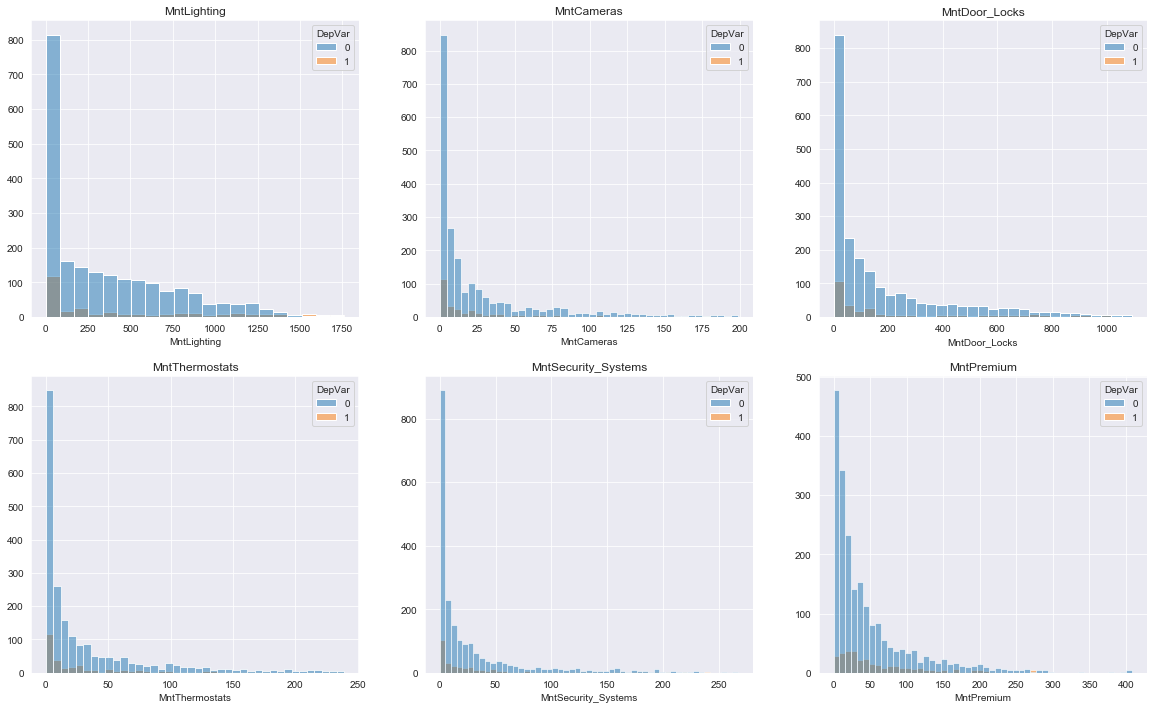

In [17]:
# vars com outliers
sns.set_style(style="darkgrid") 
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))

sns.histplot(data=df_prep, x='MntLighting', hue="DepVar", ax=axes[0][0]).set(ylabel=None);
sns.histplot(data=df_prep, x='MntCameras', hue="DepVar", ax=axes[0][1]).set(ylabel=None);
sns.histplot(data=df_prep, x='MntDoor_Locks', hue="DepVar", ax=axes[0][2]).set(ylabel=None);
sns.histplot(data=df_prep, x='MntThermostats', hue="DepVar", ax=axes[1][0]).set(ylabel=None);
sns.histplot(data=df_prep, x='MntSecurity_Systems', hue="DepVar", ax=axes[1][1]).set(ylabel=None);
sns.histplot(data=df_prep, x='MntPremium', hue="DepVar", ax=axes[1][2]).set(ylabel=None);

axes[0][0].set(title='MntLighting');
axes[0][1].set(title='MntCameras');
axes[0][2].set(title='MntDoor_Locks');
axes[1][0].set(title='MntThermostats');
axes[1][1].set(title='MntSecurity_Systems');
axes[1][2].set(title='MntPremium');

plt.show();

<h4>Monetary Spends on Products</h4>
<p>We can clearly see that all mnt columns have a negative distribution that will later affect also the Total spends of the users. To solve such high distribution, we will apply a logoritm scale to all mnt values</p>

In [18]:
df_prep["logLighting"] = np.where(df_prep["MntLighting"] == 0, df_prep["MntLighting"], np.log(df_prep["MntLighting"]))
df_prep["logCameras"] = np.where(df_prep["MntCameras"] == 0, df_prep["MntCameras"], np.log(df_prep["MntCameras"]))
df_prep["logDoor_Locks"] = np.where(df_prep["MntDoor_Locks"] == 0, df_prep["MntDoor_Locks"], np.log(df_prep["MntDoor_Locks"]))
df_prep["logThermostats"] = np.where(df_prep["MntThermostats"] == 0, df_prep["MntThermostats"], np.log(df_prep["MntThermostats"]))
df_prep["logSecurity_Systems"] = np.where(df_prep["MntSecurity_Systems"] == 0, df_prep["MntSecurity_Systems"], np.log(df_prep["MntSecurity_Systems"]))
df_prep["logPremium"] = np.where(df_prep["MntPremium"] == 0, df_prep["MntPremium"], np.log(df_prep["MntPremium"]))

/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lagonick/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/lagonick/opt/anaconda3/lib/python3.7/s

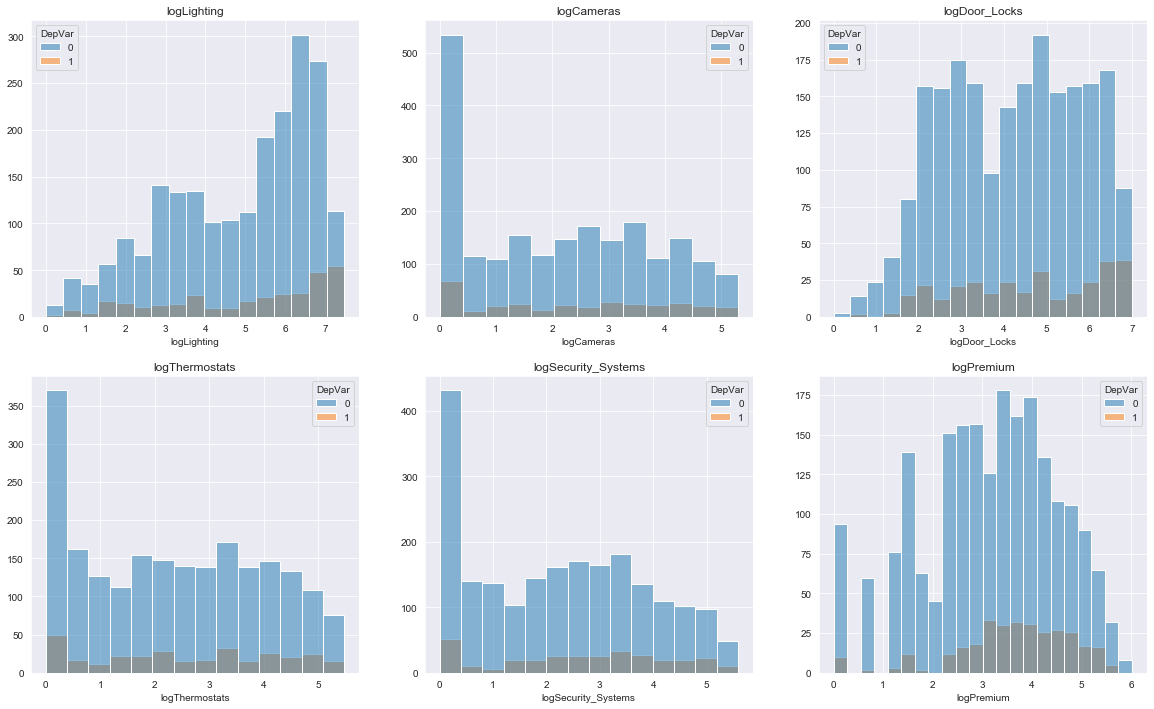

In [20]:
# vars com outliers
sns.set_style(style="darkgrid") 
f, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))

sns.histplot(data=df_prep, x='logLighting', hue="DepVar", ax=axes[0][0]).set(ylabel=None);
sns.histplot(data=df_prep, x='logCameras', hue="DepVar", ax=axes[0][1]).set(ylabel=None);
sns.histplot(data=df_prep, x='logDoor_Locks', hue="DepVar", ax=axes[0][2]).set(ylabel=None);
sns.histplot(data=df_prep, x='logThermostats', hue="DepVar", ax=axes[1][0]).set(ylabel=None);
sns.histplot(data=df_prep, x='logSecurity_Systems', hue="DepVar", ax=axes[1][1]).set(ylabel=None);
sns.histplot(data=df_prep, x='logPremium', hue="DepVar", ax=axes[1][2]).set(ylabel=None);


axes[0][0].set(title='logLighting');
axes[0][1].set(title='logCameras');
axes[0][2].set(title='logDoor_Locks');
axes[1][0].set(title='logThermostats');
axes[1][1].set(title='logSecurity_Systems');
axes[1][2].set(title='logPremium');

plt.show();

In [21]:
#Creating a column with the sum of the Mnt Values
df_prep["logTotal"] = df_prep["logLighting"] + df_prep["logCameras"] + df_prep["logDoor_Locks"] + df_prep["logThermostats"] + df_prep["logSecurity_Systems"] + df_prep["logPremium"]

In [22]:
#Dropping the original monetary coumns
mntCols = ['MntLighting','MntCameras', 'MntDoor_Locks', 'MntThermostats', 'MntSecurity_Systems', 'MntPremium']

df_prep.drop(columns=mntCols, axis=1, inplace=True)

In [23]:
df_prep.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2444.0,69589.882979,28781.846965,2268.0,47350.000000,70178.000000,92160.000000,149126.000000
Recency,2444.0,49.859656,28.720546,0.0,25.000000,51.000000,74.000000,99.000000
NumDealsPurchases,2444.0,2.219313,1.775400,0.0,1.000000,2.000000,3.000000,11.000000
NumWebPurchases,2444.0,10.010638,2.848165,1.0,8.000000,10.000000,12.000000,17.000000
NumCatalogPurchases,2444.0,4.657119,2.837722,0.0,2.000000,4.000000,6.000000,13.000000
NumStorePurchases,2444.0,5.746318,3.220554,0.0,3.000000,5.000000,8.000000,13.000000
NumWebVisitsMonth,2444.0,5.317512,2.507101,0.0,3.000000,6.000000,7.000000,18.000000
Complain,2444.0,0.009820,0.098628,0.0,0.000000,0.000000,0.000000,1.000000
Z_CostContact,2444.0,4.000000,0.000000,4.0,4.000000,4.000000,4.000000,4.000000
Z_Revenue,2444.0,14.000000,0.000000,14.0,14.000000,14.000000,14.000000,14.000000


## Categorical Values

In [24]:
#Visualizing Categorical Values
df_prep.describe(include="object")

,Education,Marital_Status
count,2444,2444
unique,4,5
top,PhD,Married
freq,1329,1026


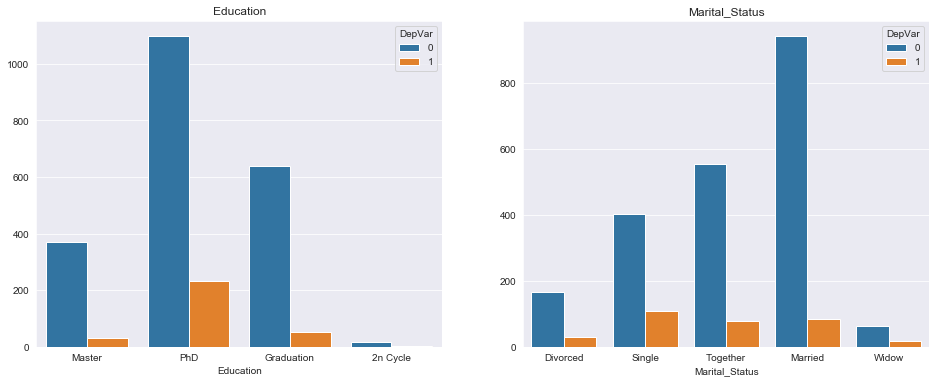

In [25]:
sns.set_style(style="darkgrid") 
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

sns.countplot(data=df_prep, x='Education', hue="DepVar", ax=ax[0]).set(ylabel=None);
sns.countplot(data=df_prep, x='Marital_Status', hue="DepVar", ax=ax[1]).set(ylabel=None);

ax[0].set(title='Education');
ax[1].set(title='Marital_Status');

plt.show();

In [26]:
educationDict = {
    'Master': 'Pos-Graduated',
    'PhD': 'Pos-Graduated',
    'Graduation': 'Graduated-2n Cycle',
    '2n Cycle': 'Graduated-2n Cycle'
}

maritalStatusDict = {
    'Divorced': 'Single',
    'Single': 'Single',
    'Widow': 'Single',
    'Together': 'Togheter',
    'Married': 'Togheter'
}

df_prep['Education'] = df_prep['Education'].replace(educationDict)
df_prep['Marital_Status'] = df_prep['Marital_Status'].replace(maritalStatusDict)

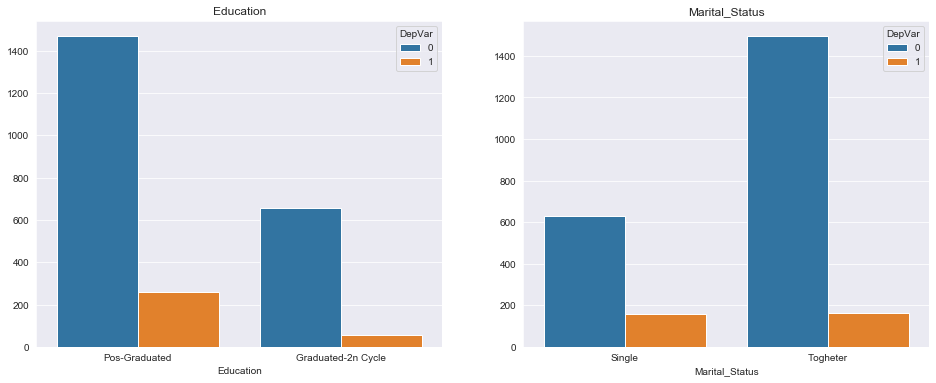

In [27]:
sns.set_style(style="darkgrid") 
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

sns.countplot(data=df_prep, x='Education', hue="DepVar", ax=ax[0]).set(ylabel=None);
sns.countplot(data=df_prep, x='Marital_Status', hue="DepVar", ax=ax[1]).set(ylabel=None);

ax[0].set(title='Education');
ax[1].set(title='Marital_Status');

plt.show();

In [28]:
# Enconding the columns that are strings or categorical
colsToEncode = ["Education", "Marital_Status"]
dummies = pd.get_dummies(df_prep[colsToEncode])
df_prep = pd.concat([df_prep, dummies], axis=1)

# Deleting the older columns
df_prep.drop(columns=colsToEncode, inplace=True)

## Viewing the Prepared Table

In [29]:
#Dropping the original monetary coumns
contactCols = ['Z_CostContact','Z_Revenue']

df_prep.drop(columns=contactCols, axis=1, inplace=True)

In [30]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2444 entries, 350001144 to 350011119
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Income                        2444 non-null   float64
 1   Recency                       2444 non-null   int64  
 2   NumDealsPurchases             2444 non-null   int64  
 3   NumWebPurchases               2444 non-null   int64  
 4   NumCatalogPurchases           2444 non-null   int64  
 5   NumStorePurchases             2444 non-null   int64  
 6   NumWebVisitsMonth             2444 non-null   int64  
 7   Complain                      2444 non-null   int64  
 8   DepVar                        2444 non-null   int64  
 9   Age                           2444 non-null   int64  
 10  DaysAsCustomer                2444 non-null   int64  
 11  Children                      2444 non-null   int64  
 12  AcceptCmpTotal                2444 non-null   int

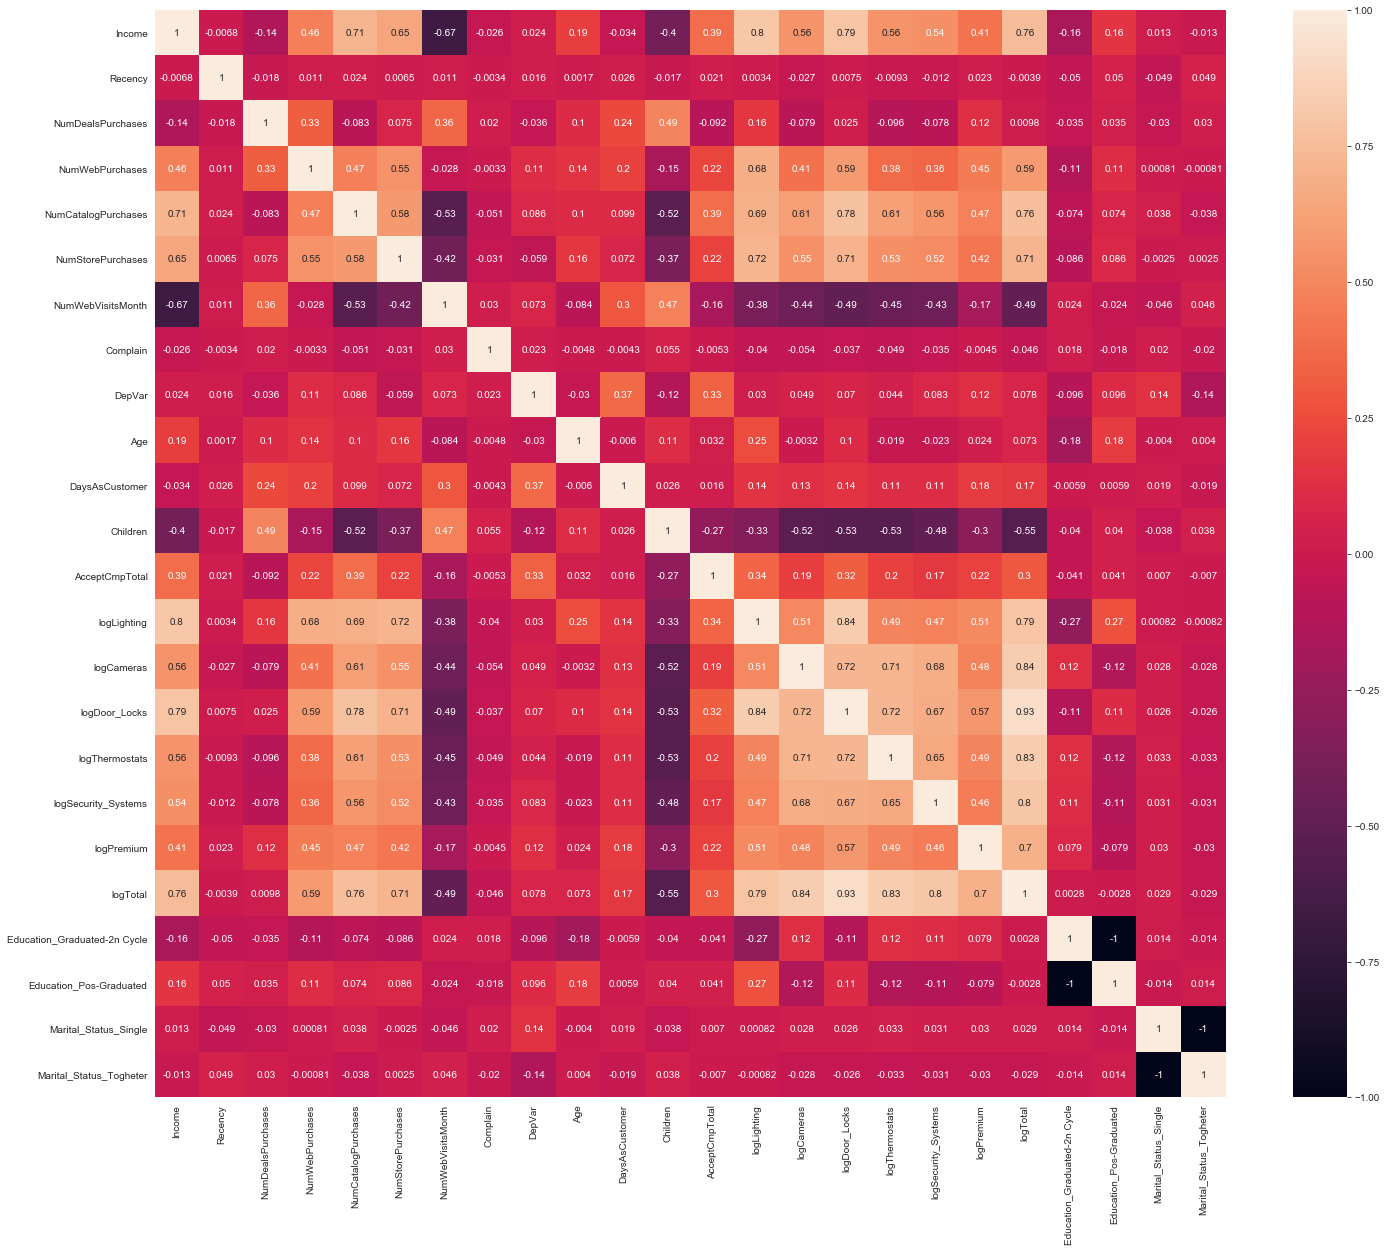

In [31]:
plt.figure(figsize=(24,20))
sns.heatmap(df_prep.corr(), annot=True)
plt.show()